In [4]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd

In [5]:
year = 2023
circuit = 'Jeddah'

# Load the session data
race = ff1.get_session(year, circuit, 'R')
laps = race.load_laps(with_telemetry=True)

C:\Users\Imran\anaconda3\lib\site-packages\fastf1\core.py:1220: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api         WARNING 	Driver 241: Position data is incomplete!
api         WARNING 	Driver 242: Position data is incomplete!
api         WARNING 	Driver 243: Position 

In [6]:
driver_stints = laps[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()

In [7]:
driver_stints = driver_stints.rename(columns={'LapNumber': 'StintLength'})

driver_stints = driver_stints.sort_values(by=['Stint'])

In [8]:
compound_colors = {
    'SOFT': 'red',
    'MEDIUM': 'yellow',
    'HARD': 'white',
    'INTERMEDIATE': 'green',
    'WET': 'blue',
}

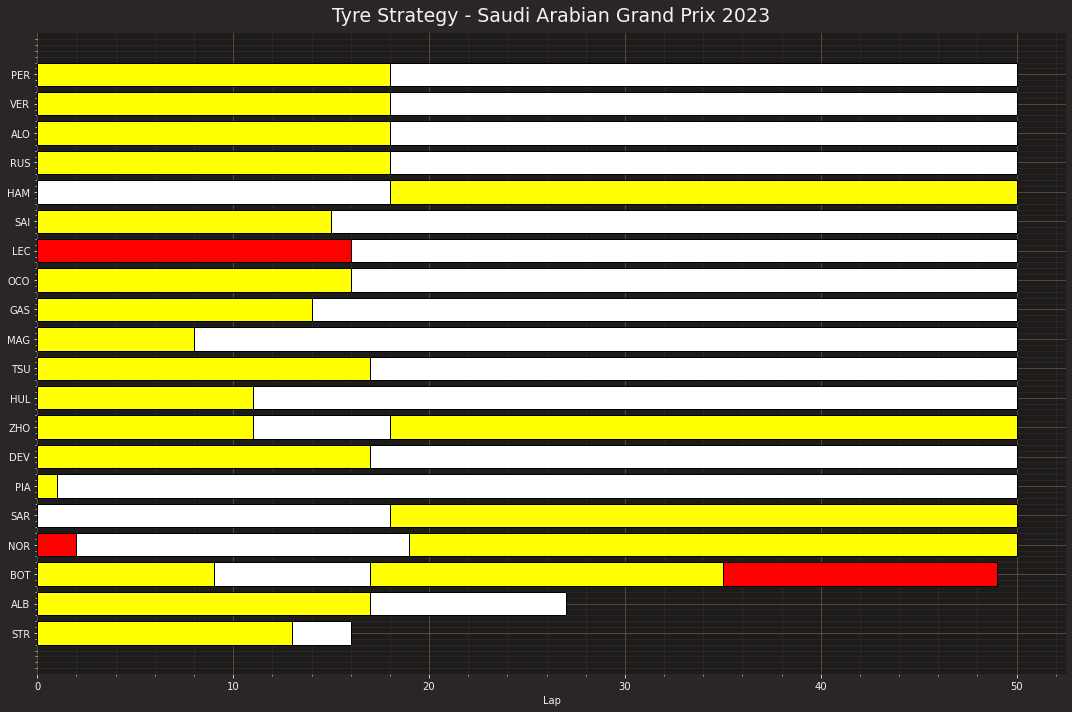

In [9]:
plotting.setup_mpl()
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

for driver in race.results['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]
    
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            [driver], 
            stint['StintLength'], 
            left=previous_stint_end, 
            color=compound_colors[stint['Compound']], 
            edgecolor = "black"
        )
        
        previous_stint_end = previous_stint_end + stint['StintLength']
        
# Set title
plt.title(f'Tyre Strategy - Saudi Arabian Grand Prix 2023')
        
# Set x-label
plt.xlabel('Lap')

# Invert y-axis 
plt.gca().invert_yaxis()

# Remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('Jeddah GP 2023 Tyre Strategy.png', dpi=350)